In [1]:
## 최종 EDA

In [98]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/minjiku/Desktop/비정태적CNN/dfforeda.csv", index_col=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   폐업여부                         406 non-null    int64  
 1   식당명                          406 non-null    object 
 2   행정동_코드_명                     406 non-null    object 
 3   nearest_station              406 non-null    object 
 4   distance_to_nearest_station  406 non-null    float64
 5   총_유동인구_수                     406 non-null    int64  
 6   남성_유동인구_수                    406 non-null    int64  
 7   여성_유동인구_수                    406 non-null    int64  
 8   연령대_10_유동인구_수                406 non-null    int64  
 9   연령대_20_유동인구_수                406 non-null    int64  
 10  연령대_30_유동인구_수                406 non-null    int64  
 11  연령대_40_유동인구_수                406 non-null    int64  
 12  연령대_50_유동인구_수                406 non-null    int64  
 13  연령대_60_이상_유동인구_수    

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 설정 (MacOS에서 'AppleGothic' 폰트 사용)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

/var/folders/v_/ccwz5s7931bf1s6yx_rzlzqm0000gn/T/ipykernel_82059/3457277578.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=scaled_data, x='폐업여부', y=col, palette='Set2')
/var/folders/v_/ccwz5s7931bf1s6yx_rzlzqm0000gn/T/ipykernel_82059/3457277578.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=scaled_data, x='폐업여부', y=col, palette='Set2')


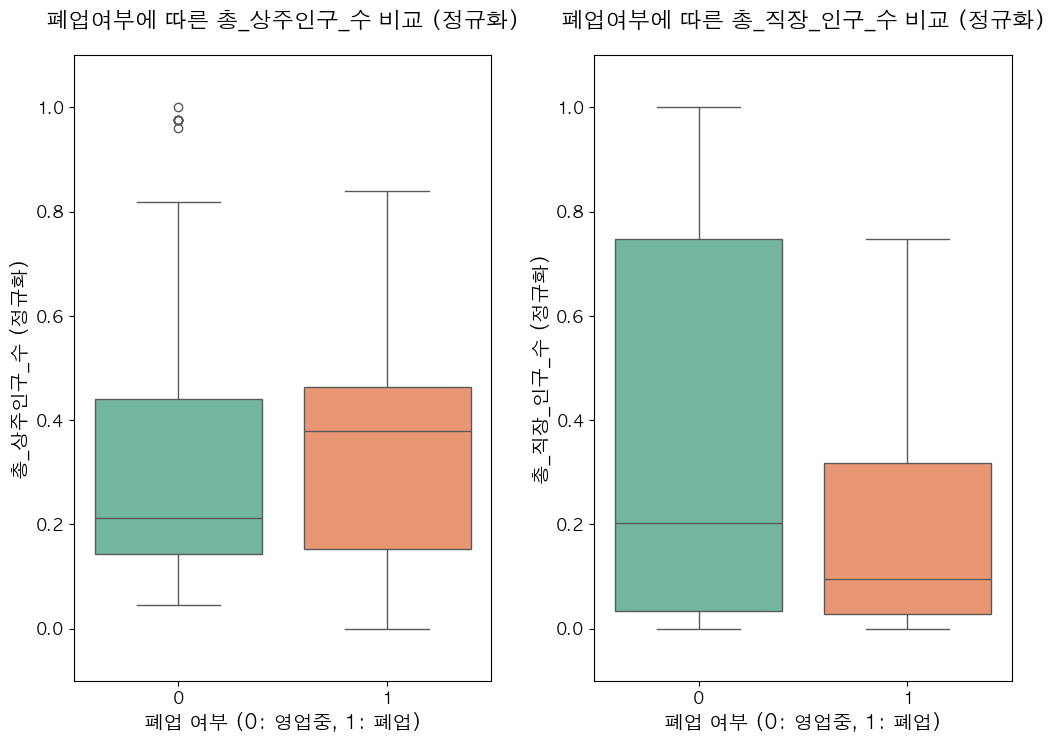

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 폰트 크기 설정
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# MinMax 스케일링 적용
scaler = MinMaxScaler()
columns_to_analyze = ['총_상주인구_수', '총_직장_인구_수']

# 데이터 정규화
scaled_data = pd.DataFrame()
scaled_data['폐업여부'] = df['폐업여부']
for col in columns_to_analyze:
    scaled_data[col] = scaler.fit_transform(df[[col]])

# 그래프 생성
plt.figure(figsize=(16, 8))

# subplot 위치 설정
positions = [1, 2, 3]

for pos, col in zip(positions, columns_to_analyze):
    plt.subplot(1, 3, pos)
    
    # 박스플롯 생성
    sns.boxplot(data=scaled_data, x='폐업여부', y=col, palette='Set2')
    
    # y축 범위 설정 (약간의 여유 포함)
    plt.ylim(-0.1, 1.1)
    
    # 통계값 표시
    for status in [0, 1]:
        data = scaled_data[scaled_data['폐업여부'] == status][col]
        min_val = data.min()
        max_val = data.max()
        mean_val = data.mean()
    
    plt.title(f'폐업여부에 따른 {col} 비교 (정규화)', pad=20)
    plt.xlabel('폐업 여부 (0: 영업중, 1: 폐업)')
    plt.ylabel(f'{col} (정규화)')

# 전체 레이아웃 조정
plt.tight_layout(pad=2.0)
plt.show()

In [30]:
df['폐업여부'].value_counts()

폐업여부
0    371
1     35
Name: count, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 준비 (폐업여부와 상관 변수들)
X = df[['총_직장_인구_수', '총_상주인구_수']]   # 독립 변수
y = df['폐업여부']  # 종속 변수

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# 모델 예측 및 정확도 평가
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy}")

# 회귀 계수 확인
coefficients = log_reg_model.coef_
print(f"총 직장 인구 계수: {coefficients[0][0]}")
print(f"총 상주 인구 계수: {coefficients[0][1]}")


모델 정확도: 0.9390243902439024
총 직장 인구 계수: -1.4569856426768969e-05
총 상주 인구 계수: -7.294320235783704e-06


In [38]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 데이터프레임의 수치형 컬럼만 선택하여 스케일링
df_scaled = df.copy()  # 원본 데이터프레임 보존

# 스케일링할 컬럼 지정 (수치형 컬럼만 선택)
columns_to_scale = df.select_dtypes(include=['float64', 'int64']).columns

# Min-Max 스케일링 적용
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# 스케일링된 데이터프레임 확인
print(df_scaled.head())


   폐업여부     식당명 행정동_코드_명 nearest_station  distance_to_nearest_station  \
0   0.0     대관원     당산2동           영등포구청                     0.157817   
1   1.0  민어집병우네      삼청동              안국                     0.331066   
2   1.0    청담테라      청담동              청담                     0.221833   
3   1.0     코퍼룸      삼성동             선정릉                     0.037426   
4   0.0   툇마루밥상     문정1동              문정                     0.082113   

   총_유동인구_수  남성_유동인구_수  여성_유동인구_수  연령대_10_유동인구_수  연령대_20_유동인구_수  ...  \
0  0.476760   0.504721   0.454375       0.425680       0.254421  ...   
1  0.036573   0.035832   0.037166       0.019027       0.018763  ...   
2  0.512568   0.538678   0.491666       0.397627       0.230562  ...   
3  0.397253   0.449838   0.355156       0.240780       0.230986  ...   
4  0.234308   0.247280   0.223923       0.208431       0.105412  ...   

   구글리뷰 감성점수(KNU)  구글리뷰_딥러닝  블로그리뷰_딥러닝  유튜브리뷰_딥러닝  방송_6시내고향  방송_골목식당  방송_또간집  \
0        0.000319  0.217797   0.577128   0.46346

/var/folders/v_/ccwz5s7931bf1s6yx_rzlzqm0000gn/T/ipykernel_82059/4120061686.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='식당명', y='감성 점수', hue='폐업여부', data=df_long, palette='Set2', ci=None)


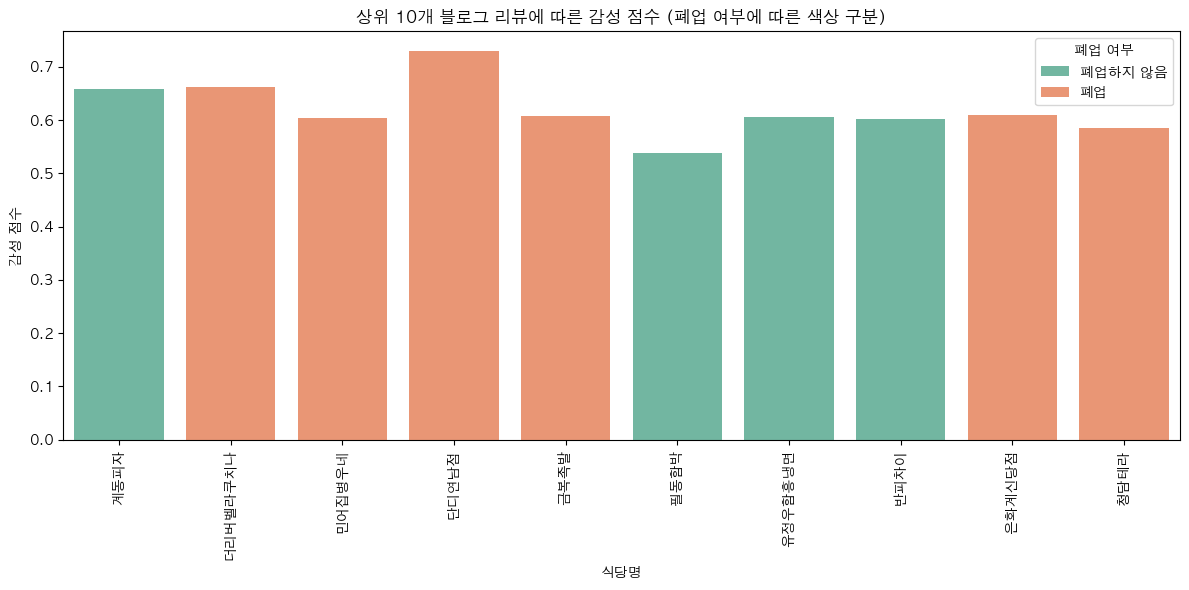

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폐업 여부와 감성 점수 컬럼을 기준으로 폐업한 식당과 폐업하지 않은 식당의 감성 점수 비교
# 감성 점수 컬럼들
sentiment_columns = [
    '구글리뷰_딥러닝',
    '블로그리뷰_딥러닝',
    '유튜브리뷰_딥러닝'
]

# 블로그리뷰_딥러닝 기준으로 상위 10개 식당 선택 후 정렬
top_10_blog = df.nlargest(10, '블로그리뷰_딥러닝').sort_values(by='블로그리뷰_딥러닝', ascending=False)

# 각 식당에 대한 감성 점수 데이터를 long 형태로 변형
df_long = top_10_blog.melt(id_vars=['식당명', '폐업여부'], value_vars=sentiment_columns, 
                           var_name='리뷰 종류', value_name='감성 점수')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='식당명', y='감성 점수', hue='폐업여부', data=df_long, palette='Set2', ci=None)

# 그래프 제목 및 레이블 설정
plt.title('상위 10개 블로그 리뷰에 따른 감성 점수 (폐업 여부에 따른 색상 구분)')
plt.xlabel('식당명')
plt.ylabel('감성 점수')

# x축 레이블 회전
plt.xticks(rotation=90)

# 범례 위치 설정
plt.legend(title='폐업 여부', labels=['폐업하지 않음', '폐업'])

plt.tight_layout()
plt.show()


/var/folders/v_/ccwz5s7931bf1s6yx_rzlzqm0000gn/T/ipykernel_82059/2865862865.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='식당명', y='감성 점수', hue='폐업여부', data=df_long, palette={0: "lightblue", 1: "salmon"}, ci=None)


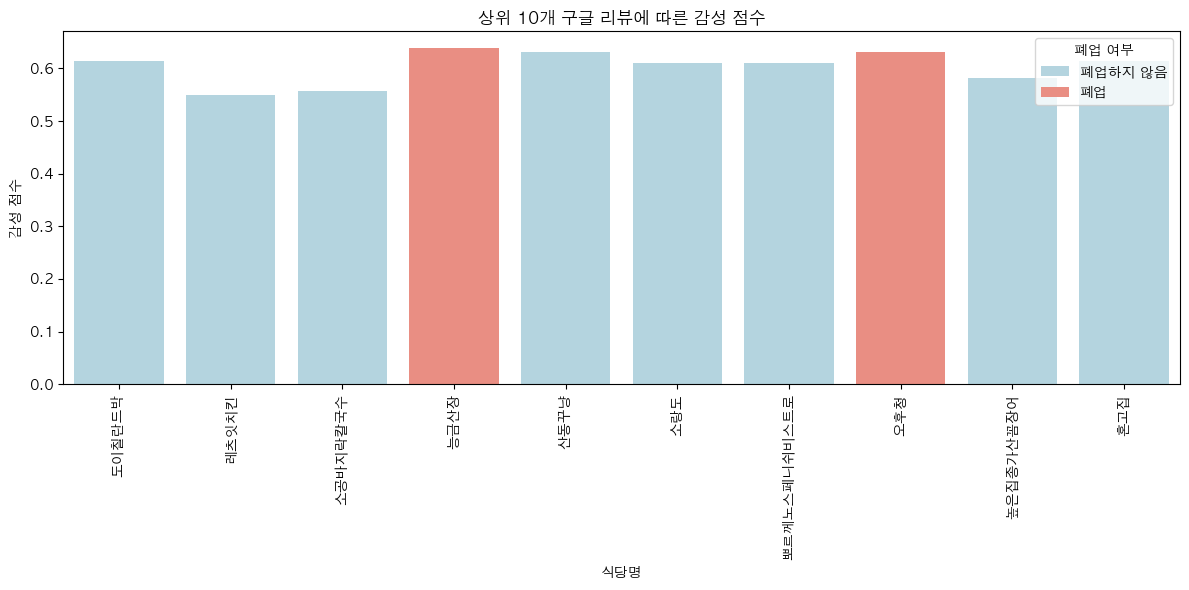

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 폐업 여부와 감성 점수 컬럼을 기준으로 폐업한 식당과 폐업하지 않은 식당의 감성 점수 비교
# 감성 점수 컬럼들
# sentiment_columns = [
#     '구글리뷰_딥러닝',
#     '구ㄱ리뷰_딥러닝',
#     '유튜브리뷰_딥러닝'
# ]

# 블로그리뷰_딥러닝 기준으로 상위 10개 식당 선택 후 정렬
top_10_blog = df.nlargest(10, '구글리뷰_딥러닝')

# 식당명을 블로그리뷰_딥러닝 값에 따라 정렬
top_10_blog['식당명'] = pd.Categorical(top_10_blog['식당명'], categories=top_10_blog.sort_values('구글리뷰_딥러닝', ascending=False)['식당명'], ordered=True)

# 각 식당에 대한 감성 점수 데이터를 long 형태로 변형
df_long = top_10_blog.melt(id_vars=['식당명', '폐업여부'], value_vars=sentiment_columns, 
                           var_name='리뷰 종류', value_name='감성 점수')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='식당명', y='감성 점수', hue='폐업여부', data=df_long, palette={0: "lightblue", 1: "salmon"}, ci=None)

# 그래프 제목 및 레이블 설정
plt.title('상위 10개 구글 리뷰에 따른 감성 점수')
plt.xlabel('식당명')
plt.ylabel('감성 점수')

# x축 레이블 회전
plt.xticks(rotation=90)

# 범례 위치 설정
plt.legend(title='폐업 여부', labels=['폐업하지 않음', '폐업'])

plt.tight_layout()
plt.show()


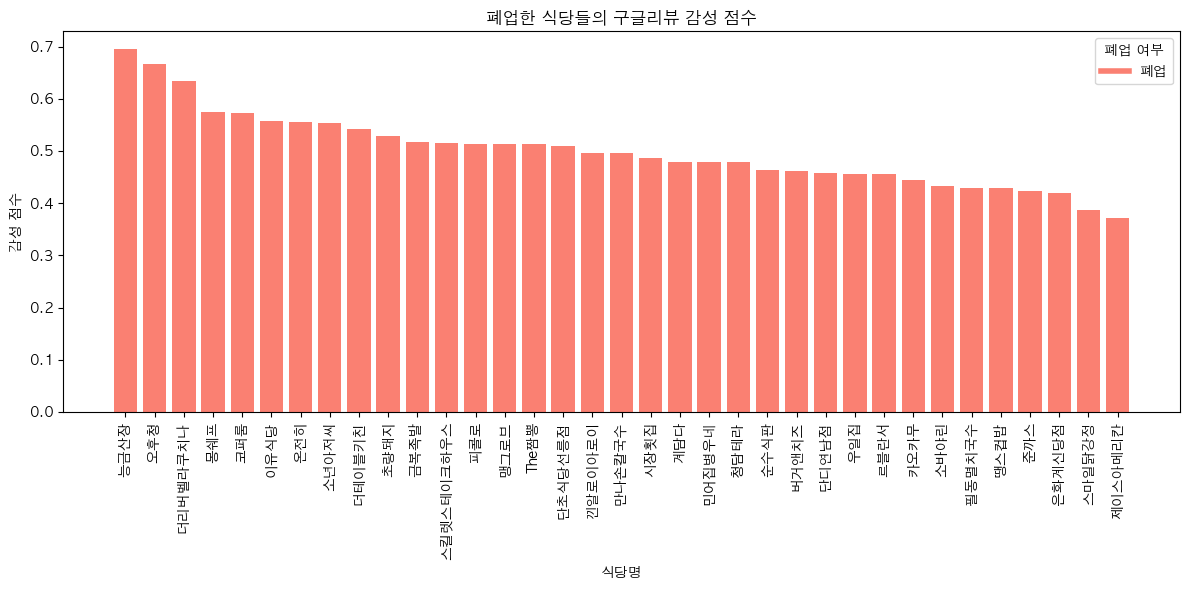

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 구글리뷰 감성 점수 컬럼
sentiment_column = '구글리뷰_딥러닝'

# 폐업한 식당만 선택 (폐업여부 == 1)
closed_restaurants = df[df['폐업여부'] == 1]

# 폐업한 식당을 구글리뷰_딥러닝 값에 따라 정렬
closed_restaurants = closed_restaurants.sort_values(by=sentiment_column, ascending=False)

# 각 식당에 대한 감성 점수 데이터를 long 형태로 변형
df_long_closed = closed_restaurants.melt(id_vars=['식당명', '폐업여부'], value_vars=[sentiment_column], 
                                         var_name='리뷰 종류', value_name='감성 점수')

# 색상 설정: 폐업여부에 따른 색 구분 (0: 폐업하지 않음, 1: 폐업)
colors_closed = df_long_closed['폐업여부'].map({0: "lightblue", 1: "salmon"})

# 시각화 (Matplotlib을 사용한 막대그래프)
plt.figure(figsize=(12, 6))

# 막대그래프 그리기
bars_closed = plt.bar(df_long_closed['식당명'], df_long_closed['감성 점수'], color=colors_closed)

# 그래프 제목 및 레이블 설정
plt.title('폐업한 식당들의 구글리뷰 감성 점수')
plt.xlabel('식당명')
plt.ylabel('감성 점수')

# x축 레이블 회전
plt.xticks(rotation=90)

# 범례 추가 (폐업 여부에 따른 색상)
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='salmon', lw=4, label='폐업')]
plt.legend(handles=legend_elements, title="폐업 여부")

plt.tight_layout()
plt.show()


In [79]:
import pandas as pd

# 방송별로 폐업 비율 계산
closure_rate_by_broadcast = df.groupby('방송')['폐업여부'].mean()

# 결과 출력
print(closure_rate_by_broadcast)



방송
6시내고향      0.023810
골목식당       0.295455
또간집        0.040000
맛있는 녀석들    0.084906
생활의달인      0.058824
수요미식회      0.081081
Name: 폐업여부, dtype: float64


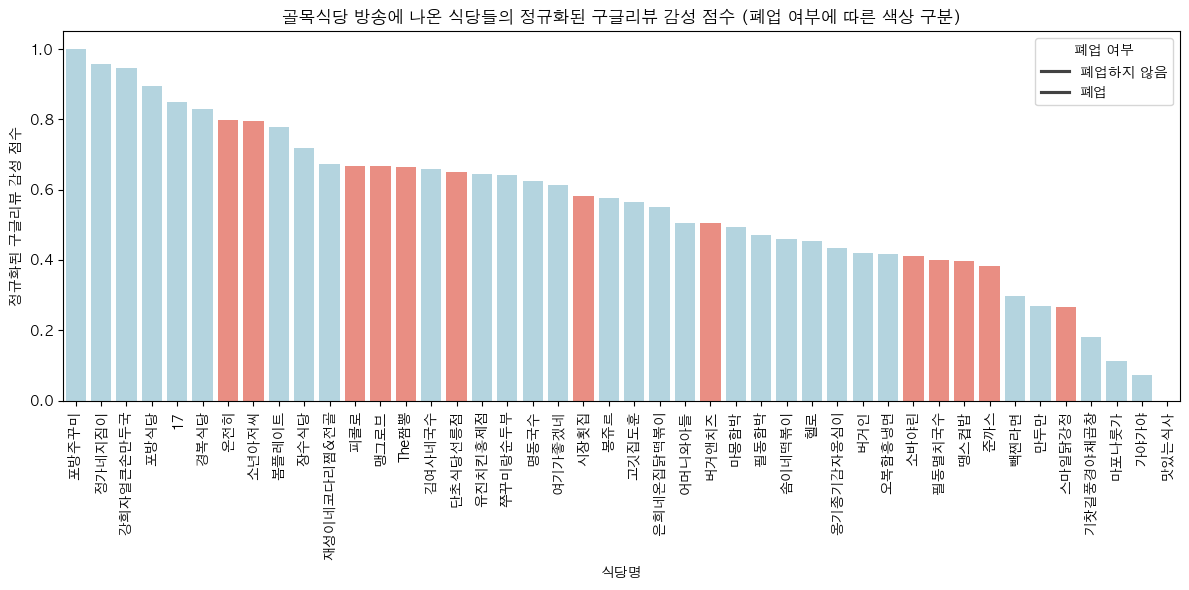

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# '방송'이 '골목식당'인 행들만 필터링
golmok_restaurants = df[df['방송'] == '골목식당']

# 구글리뷰_딥러닝 점수 기준으로 정렬 (내림차순)
golmok_restaurants = golmok_restaurants.sort_values(by='구글리뷰_딥러닝', ascending=False)

# Min-Max Scaling 적용 (구글리뷰 감성점수)
scaler = MinMaxScaler()
golmok_restaurants['정규화된 구글리뷰 감성점수'] = scaler.fit_transform(golmok_restaurants[['구글리뷰_딥러닝']])

# 구글리뷰_딥러닝 점수 시각화 (폐업 여부에 따른 색 구분)
plt.figure(figsize=(12, 6))
sns.barplot(x='식당명', y='정규화된 구글리뷰 감성점수', hue='폐업여부', data=golmok_restaurants, palette={0: "lightblue", 1: "salmon"})

# 그래프 제목 및 레이블 설정
plt.title('골목식당 방송에 나온 식당들의 정규화된 구글리뷰 감성 점수 (폐업 여부에 따른 색상 구분)')
plt.xlabel('식당명')
plt.ylabel('정규화된 구글리뷰 감성 점수')

# x축 레이블 회전
plt.xticks(rotation=90)

# 범례 위치 설정
plt.legend(title='폐업 여부', labels=['폐업하지 않음', '폐업'])

plt.tight_layout()
plt.show()

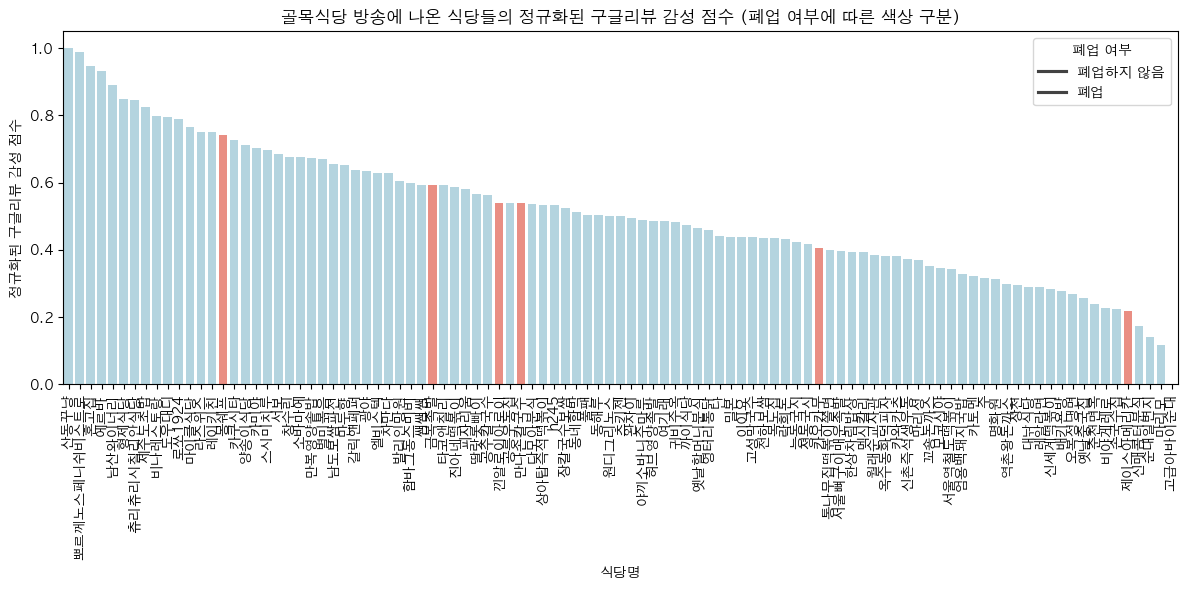

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# '방송'이 '골목식당'인 행들만 필터링
golmok_restaurants = df[df['방송'] == '생활의달인']

# 구글리뷰_딥러닝 점수 기준으로 정렬 (내림차순)
golmok_restaurants = golmok_restaurants.sort_values(by='구글리뷰_딥러닝', ascending=False)

# Min-Max Scaling 적용 (구글리뷰 감성점수)
scaler = MinMaxScaler()
golmok_restaurants['정규화된 구글리뷰 감성점수'] = scaler.fit_transform(golmok_restaurants[['구글리뷰_딥러닝']])

# 구글리뷰_딥러닝 점수 시각화 (폐업 여부에 따른 색 구분)
plt.figure(figsize=(12, 6))
sns.barplot(x='식당명', y='정규화된 구글리뷰 감성점수', hue='폐업여부', data=golmok_restaurants, palette={0: "lightblue", 1: "salmon"})

# 그래프 제목 및 레이블 설정
plt.title('골목식당 방송에 나온 식당들의 정규화된 구글리뷰 감성 점수 (폐업 여부에 따른 색상 구분)')
plt.xlabel('식당명')
plt.ylabel('정규화된 구글리뷰 감성 점수')

# x축 레이블 회전
plt.xticks(rotation=90)

# 범례 위치 설정
plt.legend(title='폐업 여부', labels=['폐업하지 않음', '폐업'])

plt.tight_layout()
plt.show()

/var/folders/v_/ccwz5s7931bf1s6yx_rzlzqm0000gn/T/ipykernel_82059/1301618898.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Stimulation', data=plot_data, palette=colors)


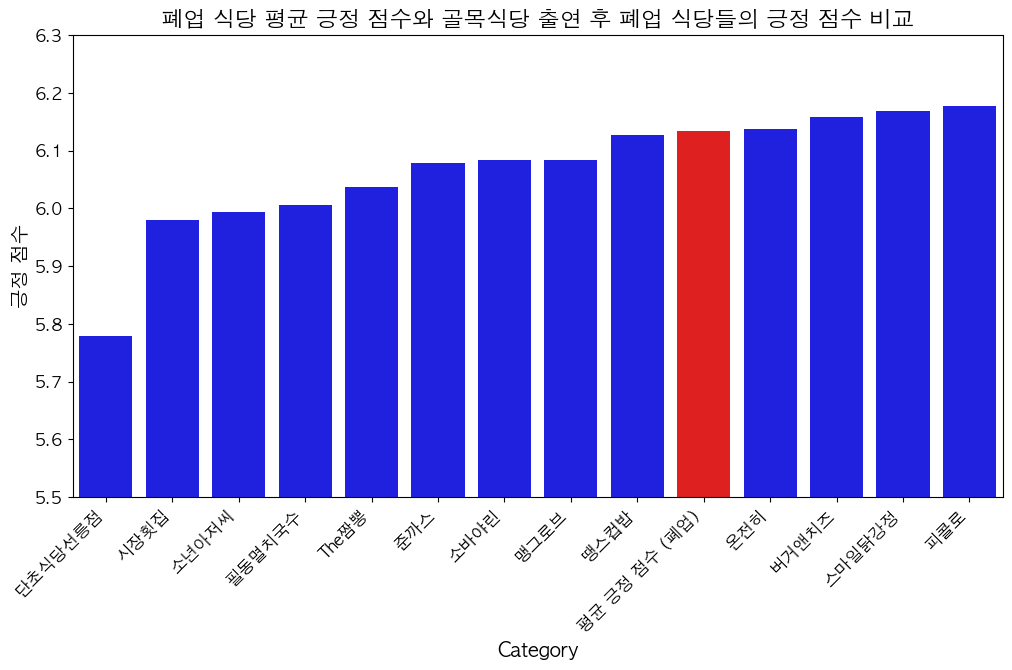

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 준비
# 폐업 식당들의 평균 '긍정 점수'
avg_stimulation_closed = df[df['폐업여부'] == 1]['블로그 번역본 감성점수(긍부정)'].mean()

# '방송_골목식당 == 1'이고 '폐업여부 == 1'인 식당들의 긍정 점수 추출
stimulation_broadcast = df[(df['방송_골목식당'] == 1) & (df['폐업여부'] == 1)][['식당명', '블로그 번역본 감성점수(긍부정)']]

# 시각화를 위한 데이터 프레임 생성
plot_data = pd.DataFrame({
    'Category': ['평균 긍정 점수 (폐업)'] + stimulation_broadcast['식당명'].tolist(),
    'Stimulation': [avg_stimulation_closed] + stimulation_broadcast['블로그 번역본 감성점수(긍부정)'].tolist()
})

# 정렬
plot_data.sort_values(by='Stimulation', inplace=True)

# 평균 점수만 색상을 다르게 지정
colors = ['red' if cat == '평균 긍정 점수 (폐업)' else 'blue' for cat in plot_data['Category']]

# Barplot 생성
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Stimulation', data=plot_data, palette=colors)

# y축 범위 설정
plt.ylim(5.5, 6.3)

# 그래프 꾸미기
plt.title('폐업 식당 평균 긍정 점수와 골목식당 출연 후 폐업 식당들의 긍정 점수 비교', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('긍정 점수', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 시각화 출력
plt.show()
